# **ADELINE MAKOKHA**
# **191199**
# **DSA 8501: TEXT AND UNSTRUCTURED DATA ANALYTICS**
# **CAT 1**


# **Understanding Customer Dissatisfaction in the Telecommunication Industries**

## **Background**

The telecommunications sector is a key pillar of digital and economic landscape, supporting communication, mobile financial services, and access to online resources for millions of users. As reliance on these services increases, customer expectations regarding service quality and responsiveness continue to rise, leading customers to actively voice concerns through customer service channels when problems occur. These interactions generate large volumes of unstructured text that reflect customer experiences, emotions, and service challenges, often expressed using informal language, mixed dialects, and emotional cues that are difficult to capture through traditional structured data analysis. Text and unstructured data analytics offer practical methods for extracting insights from such messages by identifying sentiment patterns and recurring service issues. This project applies text and sentiment analysis techniques to customer service messages from a telecommunications context in order to examine the emotional tone of customer complaints and uncover key factors contributing to dissatisfaction. The findings aim to demonstrate how unstructured textual data can be systematically analyzed to support improved understanding of customer experiences and inform more effective service delivery strategies.

## **Problem statement**

Telecommunications companies receive a high volume of customer service messages on a daily basis, reflecting a wide range of concerns related to network performance, billing accuracy, mobile financial services, and customer support responsiveness. While these interactions contain valuable information about customer experiences, most organizations continue to rely heavily on structured indicators such as complaint counts, call durations, or resolution times to assess service quality. This approach overlooks the rich insights embedded in the actual language used by customers, including emotional intensity, recurring frustrations, and contextual details that are not captured in numerical records. As a result, decision-makers may struggle to fully understand the underlying causes of customer dissatisfaction and to prioritize service improvements effectively. Without systematic analysis of unstructured text data, important patterns in customer complaints remain hidden, limiting the ability of telecommunications providers to respond proactively to customer needs and improve overall service delivery.


## **Justification of the study**

Analyzing customer service messages using text and unstructured data analytics provides an opportunity to bridge the gap between customer perceptions and organizational decision-making. By examining the sentiment and thematic content of customer messages, telecommunications providers can gain a clearer understanding of the issues that generate negative experiences and the emotions associated with them. This study is justified by the growing importance of customer-centered service management in highly competitive telecommunications markets, where customer retention depends not only on technical performance but also on how effectively customer concerns are addressed. From an academic perspective, the project demonstrates the practical application of text analytics techniques to real-world service data within a local context. Practically, the findings can support more informed service prioritization, improve complaint handling strategies, and highlight the value of unstructured data as a decision-support resource in the telecommunications sector.


## **Assumptions of the study**

This study is based on several assumptions that guide the analysis and interpretation of results.


* It is assumed that the customer service messages contained in the dataset reasonably reflect common issues experienced by customers within the telecommunications sector.
* The study also assumes that the emotional tone expressed in customer messages is an accurate representation of customer sentiment at the time the message was submitted.
* It is assumed that text preprocessing techniques such as tokenization and normalization preserve the core meaning of customer messages despite variations in language use, abbreviations, and informal expressions.
* It is assumed that sentiment labels and service-related attributes provided in the dataset are consistent enough to allow for comparative analysis across different complaint categories.


## **Scope of the study**

The scope of this study is limited to the analysis of unstructured textual data generated from customer service interactions within a telecommunications context. The analysis focuses on customer messages related to service delivery issues such as network reliability, billing concerns, mobile financial services, and customer support processes. The study concentrates on textual content and associated sentiment indicators, without examining detailed customer demographics, financial records, or internal operational systems. Analytical techniques applied in this project include text preprocessing, sentiment analysis, and thematic exploration of customer complaints. The study seeks to demonstrate how unstructured text data can be analyzed to gain insights into customer experiences and service challenges.


## **Research Hypotheses**

1.   Customer service messages expressing negative sentiment are more likely to be associated with unresolved or delayed resolution outcomes than messages expressing neutral or positive sentiment.
2.   Specific complaint themes identified through text analysis, such as network reliability and billing-related issues, are associated with higher levels of negative sentiment compared to other service categories.
3.   The intensity of emotional language in customer messages, measured through sentiment scores derived from textual features, is positively related to the priority level assigned to the service request.
4.   Customer messages containing repeated keywords or phrases indicative of urgency, such as requests for immediate assistance, are more likely to be flagged as high churn risk compared to messages without such indicators.
5.   Text-based features extracted from customer service messages provide stronger explanatory power for customer dissatisfaction than structured service metrics alone.



## **Data description**

The dataset used in this study consists of 10,000 customer service records representing interactions between customers and a telecommunications company. Each record contains a free-text customer message that forms the primary unstructured data component for analysis. These messages reflect real-world communication patterns commonly observed in customer support environments, including variations in sentence length, informal language, abbreviations, and the use of emotionally expressive terms. The textual content includes a mixture of English, localized expressions, reflecting the linguistic diversity of customer communication.

In addition to the raw text, the dataset includes several text-derived and service-related attributes that support supervised and exploratory analysis. These include sentiment labels, numerical sentiment scores, identified customer intent, and churn risk indicators. The presence of these attributes allows for the examination of relationships between linguistic features and service outcomes. From an NLP perspective, the dataset is suitable for tasks such as text preprocessing, feature extraction, sentiment classification, keyword analysis, and thematic exploration. The combination of raw textual messages and associated labels provides a practical foundation for applying and evaluating natural language processing techniques in a telecommunications customer service context.


## **Importing Libraries**

In [1]:
# Lets import some packages
import nltk
#nltk.download('stopwords') #if not installed
#nltk.download('wordnet') #if not installed
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import spacy
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm.notebook import tqdm
from tqdm.notebook import tqdm
import re
from collections import Counter
from wordcloud import WordCloud

## **Loading data from github**

In [2]:
#loading data from github
url = "https://raw.githubusercontent.com/adeline-pepela/Module-5/main/Text%20and%20Unstructured%20Data%20Analytics/telco.csv"

df = pd.read_csv(url)

## **Exploratory data analytics**

In [3]:
df.head()

,ticket_id,channel,county,area,customer_segment,plan_type,product,issue_category,issue_subcategory,intent,...,priority,resolution_status,first_response_time_min,resolution_time_hours,assigned_team,agent_id,action_taken,csat_1to5,nps_-100to100,churn_risk
0,KECS-20250511-00001,Call Center,Migori,Market,Consumer,Postpaid,Home Internet,Home Internet,Billing / plan upgrade,Complaint,...,Low,Resolved,11,11.63,Tech-Fiber,AG-86379,Scheduled technician visit,4.0,-42.0,Medium
1,KECS-20251118-00002,Retail Shop,Bungoma,Town,Consumer,Prepaid,Data Bundles,Data Bundles,Bundle not activated,Complaint,...,Low,Resolved,57,12.64,Tech-Network,AG-19283,Advised app update and cache clear,2.0,-19.0,Medium
2,KECS-20240723-00003,Email,Machakos,Machakos Town,Consumer,Prepaid,Account/App,Account/App,Profile update error,Complaint,...,Low,Resolved,16,8.75,Care-General,AG-84514,Escalated to technical team,2.0,-55.0,Low
3,KECS-20240214-00004,Call Center,Bungoma,Town,Consumer,Prepaid,Mobile Money,Mobile Money,PIN reset / locked account,Complaint,...,Medium,Resolved,6,16.78,MobileMoney,AG-34657,Checked transaction status; advised retry,1.0,NaN,Low
4,KECS-20250102-00005,Call Center,Kakamega,Mumias,Consumer,Prepaid,Data Bundles,Data Bundles,Data depleted too fast,Complaint,...,Low,Resolved,29,6.31,Tech-Network,AG-87262,Advised app update and cache clear,2.0,-78.0,Medium


In [4]:
df.shape

(10000, 24)

The dataset contains 10,000 customer service records with 24 attributes, combining unstructured text messages and service-related metadata. Each record represents a single customer interaction and includes a free-text message (raw_message) that serves as the primary input for natural language processing tasks. The dataset is sufficiently large to support both descriptive analysis and downstream NLP modeling.

Key observation:
The presence of both raw text and sentiment-related labels enables exploratory analysis that links language patterns with service outcomes

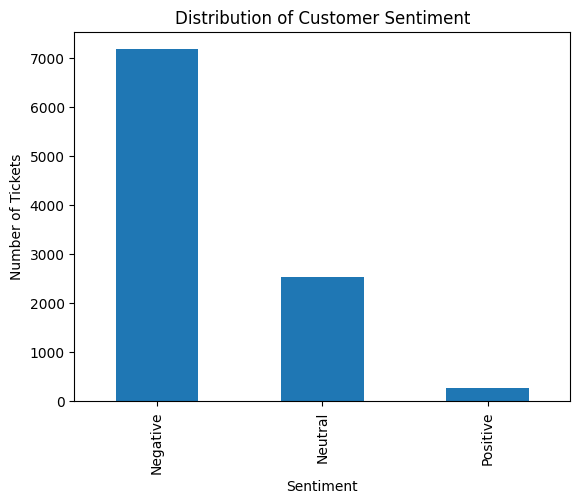

,count
sentiment_label,
Negative,7184
Neutral,2541
Positive,275


In [5]:
# Distribution of sentiment labels
sentiment_counts = df['sentiment_label'].value_counts()

plt.figure()
sentiment_counts.plot(kind='bar')
plt.title("Distribution of Customer Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tickets")
plt.show()

sentiment_counts


The sentiment label distribution shows a strong skew toward negative sentiment, with fewer neutral messages and a relatively small proportion of positive feedback.

This imbalance is expected in customer service data, where users are more likely to contact support when experiencing problems. From an NLP perspective, this highlights the importance of handling class imbalance during model development and evaluation.

In [6]:
# EDA
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_message'] = df['raw_message'].astype(str).apply(clean_text)

# Tokenize
tokens = df['clean_message'].str.split().explode()

# Most common words
common_words = Counter(tokens).most_common(20)
common_words


[('my', 10067),
 ('on', 6861),
 ('kifarutel', 6537),
 ('hi', 6262),
 ('kes', 3816),
 ('number', 3272),
 ('masked', 3206),
 ('bundle', 3063),
 ('data', 3023),
 ('transaction', 2892),
 ('internet', 2444),
 ('bundles', 2260),
 ('mobile', 2234),
 ('money', 2234),
 ('ref', 2234),
 ('m', 2234),
 ('about', 1803),
 ('sim', 1673),
 ('sms', 1593),
 ('home', 1560)]

Basic text normalization was applied by converting messages to lowercase and removing non-alphabetic characters. The cleaned messages were then tokenized to examine word frequency patterns across the entire corpus.

The most frequent tokens include terms related to:

Mobile money transactions (e.g., transaction, money, kes)

Data and internet services (e.g., data, bundle, internet)

Account and SIM-related issues (e.g., number, sim, masked)


High-frequency terms reflect core service areas that generate the most customer interactions, indicating dominant operational pain points within the telecom environment.

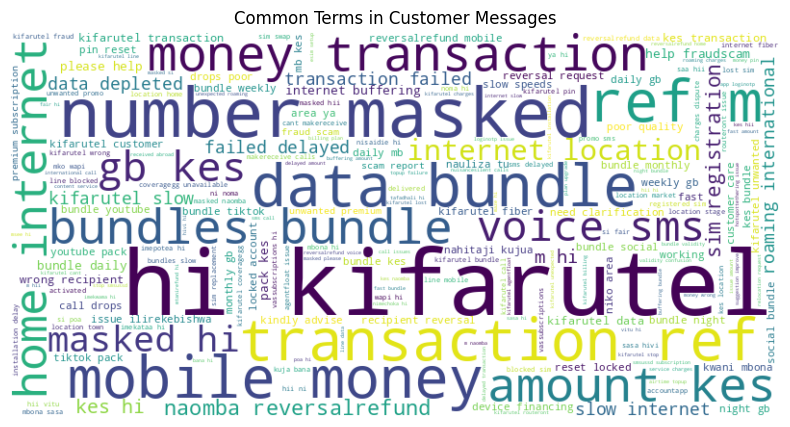

In [7]:
# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Terms in Customer Messages")
plt.show()


A word cloud was generated from the cleaned corpus to visually summarize dominant terms in customer messages. Prominent words relate to data bundles, mobile money transactions, internet connectivity, and account masking issues.


In [8]:
# Apply preprocessing to raw customer messages
df['processed_text'] = df['raw_message'].apply(clean_text)

# Inspect cleaned output
df[['raw_message', 'processed_text']].head()

,raw_message,processed_text
0,"Hi KifaruTel, Billing / plan upgrade on my Hom...",hi kifarutel billing plan upgrade on my home ...
1,"Hi KifaruTel, Bundle not activated on my Data ...",hi kifarutel bundle not activated on my data b...
2,"Hi KifaruTel, Profile update error on my Accou...",hi kifarutel profile update error on my accoun...
3,"Hi KifaruTel, PIN reset / locked account on my...",hi kifarutel pin reset locked account on my m...
4,"Hi KifaruTel, Data depleted too fast on my Dat...",hi kifarutel data depleted too fast on my data...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF with unigrams
tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,      # limit dimensionality
    min_df=5,               # ignore rare words
    max_df=0.9              # ignore very common words
)

X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

X_tfidf.shape


(10000, 283)

In [10]:
# View top TF-IDF terms
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names[:20]


array(['about', 'abroad', 'account', 'accountapp', 'activated', 'advise',
       'agentfloat', 'ahero', 'airtime', 'amount', 'app', 'area',
       'asante', 'athi', 'balance', 'bana', 'baringo', 'bay', 'big',
       'billing'], dtype=object)

In [11]:
# TF-IDF including bigrams
tfidf_ngram_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    min_df=5,
    max_df=0.9
)

X_tfidf_ngrams = tfidf_ngram_vectorizer.fit_transform(df['processed_text'])

X_tfidf_ngrams.shape


(10000, 1003)

In [12]:
# Inspect some n-gram features
ngram_features = tfidf_ngram_vectorizer.get_feature_names_out()
ngram_features[:30]


array(['about', 'about accountapp', 'about data', 'about device',
       'about home', 'about mobile', 'about roaming', 'about sim',
       'about vassubscriptions', 'about voice', 'abroad', 'abroad amount',
       'abroad my', 'abroad on', 'account', 'account amount',
       'account on', 'account transaction', 'accountapp',
       'accountapp airtime', 'accountapp app', 'accountapp balance',
       'accountapp issue', 'accountapp my', 'accountapp password',
       'accountapp profile', 'accountapp selfservice', 'activated',
       'activated amount', 'activated bundle'], dtype=object)

In [13]:
import numpy as np

# Mean TF-IDF score for each term
mean_tfidf = np.asarray(X_tfidf.mean(axis=0)).ravel()

tfidf_importance = pd.DataFrame({
    'term': feature_names,
    'mean_tfidf': mean_tfidf
}).sort_values(by='mean_tfidf', ascending=False)

tfidf_importance.head(15)


,term,mean_tfidf
154,my,0.106938
181,on,0.082767
106,kifarutel,0.082217
77,hi,0.081949
256,transaction,0.068472
104,kes,0.064193
23,bundle,0.063936
41,data,0.061987
175,number,0.057516
134,masked,0.056222


In [14]:
# Compare language across sentiment classes
sentiment_groups = {}

for sentiment in df['sentiment_label'].unique():
    texts = df[df['sentiment_label'] == sentiment]['processed_text']
    X = tfidf_vectorizer.fit_transform(texts)

    mean_scores = np.asarray(X.mean(axis=0)).ravel()
    sentiment_groups[sentiment] = pd.DataFrame({
        'term': tfidf_vectorizer.get_feature_names_out(),
        'score': mean_scores
    }).sort_values(by='score', ascending=False).head(10)

sentiment_groups


{'Negative':             term     score
 141           my  0.108622
 168           on  0.084109
 70            hi  0.083390
 95     kifarutel  0.083390
 236  transaction  0.071331
 93           kes  0.065596
 37          data  0.064141
 21        bundle  0.063872
 162       number  0.057879
 122       masked  0.056680,
 'Neutral':             term     score
 123           my  0.108169
 145           on  0.083683
 87     kifarutel  0.082975
 62            hi  0.082975
 19        bundle  0.067304
 211  transaction  0.065389
 85           kes  0.063826
 34          data  0.059449
 142       number  0.059096
 107       masked  0.057369,
 'Positive':            term     score
 37           my  0.088434
 41       number  0.088434
 26       masked  0.088434
 33        money  0.079475
 60  transaction  0.079475
 43          ref  0.079475
 32       mobile  0.079475
 5        bundle  0.077825
 56         team  0.072614
 57       thanks  0.072614}

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2016127170.py:15: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


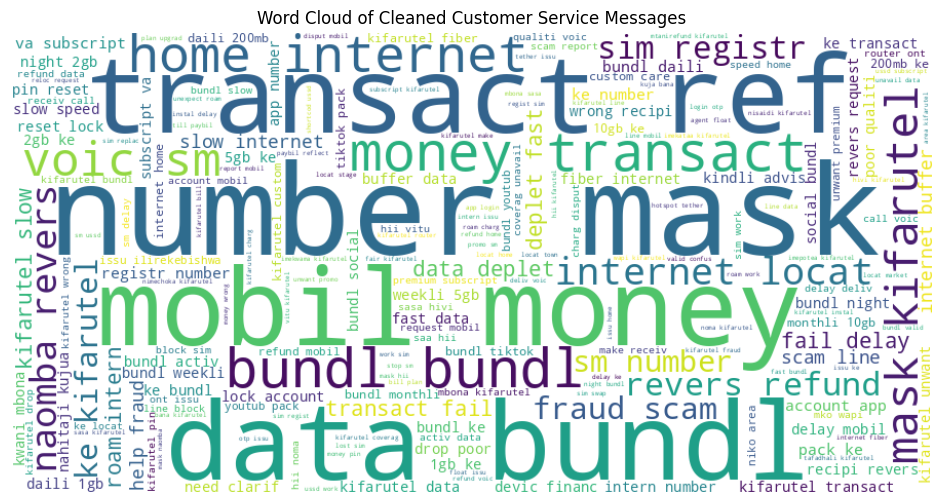

,raw_message,clean_text
0,"Hi KifaruTel, Billing / plan upgrade on my Hom...",kifarutel bill plan upgrad home internet locat...
1,"Hi KifaruTel, Bundle not activated on my Data ...",kifarutel bundl activ data bundl bundl daili 1...
2,"Hi KifaruTel, Profile update error on my Accou...",kifarutel profil updat error account app numbe...
3,"Hi KifaruTel, PIN reset / locked account on my...",kifarutel pin reset lock account mobil money t...
4,"Hi KifaruTel, Data depleted too fast on my Dat...",kifarutel data deplet fast data bundl bundl da...


In [15]:

from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

# Initialize tools
stop_words = set(ENGLISH_STOP_WORDS)
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()

# Cleaning function (robust, offline-safe)
def clean_text(text):
    if isinstance(text, str):
        text = re.sub('[^a-zA-Z0-9\n]', ' ', text)
        text = re.sub('\s+', ' ', text)
        text = text.lower()
        tokens = tokenizer.tokenize(text)
        tokens = [
            stemmer.stem(w)
            for w in tokens
            if w not in stop_words and len(w) > 2
        ]
        return " ".join(tokens)
    return ""

# Apply cleaning
df['clean_text'] = df['raw_message'].apply(clean_text)

# Combine cleaned text
corpus = " ".join(df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(
    width=900,
    height=450,
    background_color='white',
    max_words=200
).generate(corpus)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Customer Service Messages")
plt.show()

df[['raw_message', 'clean_text']].head()